# Week 4 - Exercise

## Problem Statement

The downstream processing of an aqueous stream containing therapeutic proteins produced in a bioreactor is carried out through an ultrafiltration membrane process. 
The volumetric flow to be processed is 200 $\mathrm{m^3\,day^{-1}}$, with a suspended protein concentration of 0.5 $\mathrm{kg\,m^{-3}}$. 
In order to be used in subsequent formulation stages the protein stream needs to be concentrated to 20 $\mathrm{kg\,m^{-3}}$. 

Tubular membrane modules with an exchange surface of 5 $\mathrm{m^2}$ are used to carry out the ultrafiltration process. 

Due to fouling, the water flow through these membranes decreases when protein concentration (C) increases following the empirical law: 

$$
J(C)=3.8\times10^{-2}\ln\left(\frac{145}{C}\right) \mathrm{[m\,h^{-1}]}
$$

## Requests 

- Based on steady state calculations compute the number of membrane modules necessary for the operation of this process in a single-stage feed-and-bleed configuration.
- Consider now a cascade of two stages. Compute the optimal number of membrane modules and their arrangement in stages in order to achieve the specifics required. Compute all the concentrations and volumetric flows in your process configuration of choice.  Define clearly your chosen criterion for optimality.



## Solution:

_[contributed by Max Shone, February 2024]_

## Request 1
To compute the mumber of membrane modules necessary for the operation of this process in a single-stage feed-and-bleed configuration, a mass balance and volume balance can be set up:
#### Mass Balance:
$$
Q_{in}\times C_{in}=Q_{out}\times C_{out}
$$
#### Volume Balance:
$$
Q_{in}=Q_{out}+J(C)A
$$




To solve this problem, the following steps are taken:
 - Solve mass balance for Qin.
 - Solve empirical formula for flux through membrane.
 - Rearrange volume balance for area and solve, rounding the final answer up.

In [1]:
import numpy as np
Qin = 200/24 #m^3/hr
Cin = 0.5 #kg/m^3
Cout = 20 #kg/m^3

#equations

#mass balance
Qout = Qin*Cin/Cout

#Finding flux going through membrane
Jc = (3.8*10**(-2)*np.log(145/Cout))

#Volume balance rearranged for A
A = (Qin-Qout)/Jc
n=np.ceil(A/5)
print("\nFlow rate out: ", f"{Qout:.4}", " [m^3/h]")
print("\nFlux: ", f"{Jc:.4}", " [m/h]")
print("\nMembrane Area: ", f"{A:.4}", " [m^2]")
print("\nNumber of stages: ", f"{n}", " [-]")


Flow rate out:  0.2083  [m^3/h]

Flux:  0.07528  [m/h]

Membrane Area:  107.9  [m^2]

Number of stages:  22.0  [-]


## Request 2
To find the optimal membrane configuration for a cascade of two stages, we would like to find the least number of total membranes that will result in an outlet concentration of 20 $\mathrm{kg\,m^{-3}}$. 


This can be done through completing a mass and volume balance over the first membrane, assuming the outlet concentration (C1) value, followed by completing the same calculations over the second membrane, with an outlet concentration of 20 $\mathrm{kg\,m^{-3}}$. The following graph shows all possible values of C1 between 0.5 and 20 $\mathrm{kg\,m^{-3}}$.

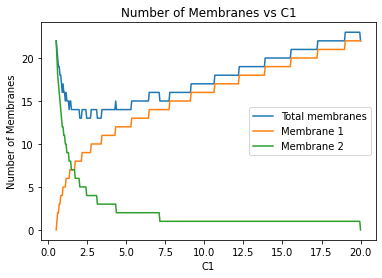


Stage 1 outlet concentration:  2.015  [kg/m^3]

Minimum number of membranes for stage 1:  8.0  [-]

Minimum number of membranes for stage 2:  5.0  [-]

Minimum number of total membranes:  13.0  [-]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Question 2 Open exercsie
#Initialising variables
Q0 = 200/24; #[m^3/day] * [day/hour]
C0 = 0.5; #kg/m^3
C1 = np.linspace(0.5, 20, num=400) #kg/m^3
C2 = 20; #kg/m^3
JC = 3.8*10**(-2)*np.log(145./C1)

#Membrane Surface Area
MSA = 5 

#Calculations over first membrane
Q1 = Q0*C0/C1
A1 = (Q0-Q1)/JC
n1 = np.ceil(A1/MSA)

#Calculations over second membrane
Q2 = Q1*C1/C2
A2 = (Q1-Q2)/JC[-1]
n2 = np.ceil(A2/MSA)

#Total membranes
n = n1+n2

# Plotting graphs
plt.plot(C1, n, label="Total membranes")
plt.plot(C1, n1, label="Membrane 1")
plt.plot(C1, n2, label="Membrane 2")

# Adding legend, labels, and title
plt.legend()
plt.xlabel("C1")
plt.ylabel("Number of Membranes")
plt.title("Number of Membranes vs C1")


# Show plot
plt.show()

#Finding index of minimum number of membranes
minN_index = np.argmin(n)

#Finding values at minimum number of membranes
minN = n[minN_index]
minN1 = n1[minN_index]
minN2 = n2[minN_index]
minC1 = C1[minN_index]

print("\nStage 1 outlet concentration: ", f"{minC1:.4}", " [kg/m^3]")
print("\nMinimum number of membranes for stage 1: ", f"{minN1}", " [-]")
print("\nMinimum number of membranes for stage 2: ", f"{minN2}", " [-]")
print("\nMinimum number of total membranes: ", f"{minN}", " [-]")

This can also be solved with GAMS:
``` python
#Note: This code cannot be run in Jupyter notebook, copy paste into GAMS.

Parameters
Q0,C0,C2;
Q0=200/24;
C0=0.5;
C2=20;

Variables
n, Q1, C1, Q2, A1, A2
;

Equations
mb1, mb2, area, vb1, vb2
;

mb1.. Q0=e=(3.8*10**(-2))*log(145/C1)*A1+Q1;
vb1.. Q1=e=Q0*C0/C1;
mb2.. Q1=e=(3.8*10**(-2))*log(145/20)*A2+Q2;
vb2.. Q2=e=Q1*C1/C2;
area.. n=e=A1/5+A2/5;

Model process /all/;
c1.l=5;
Solve process using NLP minimising n;
```

## Refinement of the GAMS Solution:
_[Contributed by Divyansh Vashishtha, March 2024]_


In this version only an integer number of membrane modules can be adopted in every stage. In this version, only an integer number of membrane modules can be adopted in every stage. 



```python
Parameters
Q0 intial volumetric flowrate coming into stage 1 [m^3 h^-1],
C0 initial protein concentration coming into stage 1  [kg m^-3 ],C2 final protein concentration leaving stage 2 [kg m^-3];
*Initialisation of Parameters from the Process Description: Q0, C0, C2.
Q0=200/24;
C0=0.5;
C2=20;

Variables
n total number of membrane modules across the two stages [decimal],
Q1 volumetric flowrate leaving the first stage [m^3 h^-1],
C1 concentration of protein leaving the first stage [kg m^-3],
Q2 volumetric flowrate leaving the second stage [m^3 h^-1],
A1 Total area of membranes required in stage 1 [m^2],
A2 Total area of membranes required in stage 2 [m^2],
n1 number of membrane modules required for stage 1 [decimal],
n1_rounded minimum number of membrane modules required for stage 1 [integer],
n2 number of membrane modules required for stage 2 [decimal],
n2_rounded minimum number of membrane modules required for stage 2 [integer],
nx rounded up value of the total membranes required [integer].
;

Equations
mb1 equation for the mass balane of the solute over stage 1,
mb2 equation for the mass balance of the solute over stage 2,
area1 equation for the area of membrane required over the first stage,
vb1 equation for the volume balance over stage 1,
vb2 equation for the volume balance over stage 2,
area2 equation for the area of membrane required over the second stage,
roundn1 equation that rounds up the decimal value of the number of membrane modules obtained in the first stage ,
roundn2 equation that rounds up the decimal value of the number of membrane modules obtained in the second stage,
total_n equation that determines the total number of membrane modules obtained over the two stages [returns a decimal],
roundN equation that displays the rounded number of total membrane modules over the two stages;

vb1.. Q0=e=(3.8*10**(-2))*log(145/C1)*A1+Q1;
mb1.. Q1=e=Q0*C0/C1;
vb2.. Q1=e=(3.8*10**(-2))*log(145/C2)*A2+Q2;
mb2.. Q2=e=Q1*C1/C2;
area1.. n1 =e= A1/5;
area2.. n2 =e= A2/5;
roundn1.. n1_rounded =e= ceil(n1);
roundn2.. n2_rounded =e= ceil(n2);
total_n.. n =e= n1 + n2;
roundN.. nx =e= ceil(n);

Model process /all/;
c1.l=5;
Solve process using DNLP minimising n;
display n.l, n1_rounded.l, n2_rounded.l, nx.l;
Parameters
Q0 intial volumetric flowrate coming into stage 1 [m^3 h^-1],
C0 initial protein concentration coming into stage 1  [kg m^-3 ],C2 final protein concentration leaving stage 2 [kg m^-3];
*Initialisation of Parameters from the Process Description: Q0, C0, C2.
Q0=200/24;
C0=0.5;
C2=20;

Variables
n total number of membrane modules across the two stages [decimal],
Q1 volumetric flowrate leaving the first stage [m^3 h^-1],
C1 concentration of protein leaving the first stage [kg m^-3],
Q2 volumetric flowrate leaving the second stage [m^3 h^-1],
A1 Total area of membranes required in stage 1 [m^2],
A2 Total area of membranes required in stage 2 [m^2],
n1 number of membrane modules required for stage 1 [decimal],
n1_rounded minimum number of membrane modules required for stage 1 [integer],
n2 number of membrane modules required for stage 2 [decimal],
n2_rounded minimum number of membrane modules required for stage 2 [integer],
nx rounded up value of the total membranes required [integer].
;

Equations
mb1 equation for the mass balane of the solute over stage 1,
mb2 equation for the mass balance of the solute over stage 2,
area1 equation for the area of membrane required over the first stage,
vb1 equation for the volume balance over stage 1,
vb2 equation for the volume balance over stage 2,
area2 equation for the area of membrane required over the second stage,
roundn1 equation that rounds up the decimal value of the number of membrane modules obtained in the first stage ,
roundn2 equation that rounds up the decimal value of the number of membrane modules obtained in the second stage,
total_n equation that determines the total number of membrane modules obtained over the two stages [returns a decimal],
roundN equation that displays the rounded number of total membrane modules over the two stages;

vb1.. Q0=e=(3.8*10**(-2))*log(145/C1)*A1+Q1;
mb1.. Q1=e=Q0*C0/C1;
vb2.. Q1=e=(3.8*10**(-2))*log(145/C2)*A2+Q2;
mb2.. Q2=e=Q1*C1/C2;
area1.. n1 =e= A1/5;
area2.. n2 =e= A2/5;
roundn1.. n1_rounded =e= ceil(n1);
roundn2.. n2_rounded =e= ceil(n2);
total_n.. n =e= n1 + n2;
roundN.. nx =e= ceil(n);

Model process /all/;
c1.l=5;
Solve process using DNLP minimising n;
display n.l, n1_rounded.l, n2_rounded.l, nx.l;

```